<a href="https://colab.research.google.com/github/LEEINSEO-0118/Logo_Detection/blob/main/Logo_Detect_YOLOv8_roboflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 7.1 MB/s eta 0:00:00


In [5]:
import os
import fnmatch
import zipfile

from ultralytics import YOLO
import cv2
import random
import torch

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# SEED

In [6]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(2024) # Seed 고정

# Download Zip file

In [ ]:
# wget -O 옵션으로 Roboflow Project의 데이터 다운로드
f = open('/content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/url.txt', 'r')
zip_file_url = f.read()
f.close()
!wget -O Logo.zip $zip_file_url

In [9]:
# .zip으로 저장한 다음 압축을 풀면 이미지와 정답 데이터가 있는 train, valid, test 디렉토리를 확인 가능
with zipfile.ZipFile('/content/Logo.zip') as zip_ref:
    zip_ref.extractall('/content/Logo')

In [10]:
# 파일 경로 확인
!cat /content/Logo/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['Logos']

roboflow:
  workspace: toad-lv4t5
  project: logo-detection-2-fupls
  version: 2
  license: MIT
  url: https://universe.roboflow.com/toad-lv4t5/logo-detection-2-fupls/dataset/2

# Load Model

In [11]:
model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
print(type(model.names), len(model.names))
print(model.names)

100%|██████████| 6.23M/6.23M [00:00<00:00, 23.7MB/s]


<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

In [12]:
model.train(data = '/content/Logo/data.yaml', epochs = 60, patience = 30, batch = 20, imgsz = 640)

Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Logo/data.yaml, epochs=60, time=None, patience=30, batch=20, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 755k/755k [00:00<00:00, 5.15MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/Logo/train/labels... 770 images, 1 backgrounds, 0 corrupt: 100%|██████████| 770/770 [00:00<00:00, 1304.26it/s]


train: New cache created: /content/Logo/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/Logo/valid/labels... 192 images, 2 backgrounds, 0 corrupt: 100%|██████████| 192/192 [00:00<00:00, 1067.22it/s]


val: New cache created: /content/Logo/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00046875), 63 bias(decay=0.0)
60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60     0.363G      1.926      3.025      1.517         28        640: 100%|██████████| 39/39 [00:12<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.21it/s]

                   all        192        365      0.867     0.0891      0.353      0.169



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.98G       1.73      1.971      1.358         35        640: 100%|██████████| 39/39 [00:06<00:00,  5.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.30it/s]


                   all        192        365      0.287      0.329      0.175     0.0754

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      2.97G      1.743      1.837      1.408         25        640: 100%|██████████| 39/39 [00:06<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.50it/s]


                   all        192        365      0.553      0.545      0.545      0.247

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.98G      1.743      1.662      1.391         12        640: 100%|██████████| 39/39 [00:06<00:00,  6.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.38it/s]


                   all        192        365      0.723      0.638      0.675       0.32

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.99G      1.725      1.492      1.412         38        640: 100%|██████████| 39/39 [00:06<00:00,  6.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]


                   all        192        365      0.665      0.599      0.589      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.98G      1.736      1.431      1.415         24        640: 100%|██████████| 39/39 [00:06<00:00,  5.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]


                   all        192        365      0.628      0.699      0.689      0.319

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      3.03G      1.683      1.299      1.356         28        640: 100%|██████████| 39/39 [00:06<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        192        365      0.704      0.671      0.734       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.98G      1.689      1.289      1.358         41        640: 100%|██████████| 39/39 [00:06<00:00,  5.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365      0.728       0.69      0.719      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.99G      1.704       1.29      1.395         21        640: 100%|██████████| 39/39 [00:06<00:00,  5.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]

                   all        192        365      0.727      0.729      0.782      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      3.02G      1.664      1.238      1.387         29        640: 100%|██████████| 39/39 [00:06<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        192        365      0.707      0.715      0.719      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      3.01G       1.65      1.223      1.344         39        640: 100%|██████████| 39/39 [00:06<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.68it/s]

                   all        192        365      0.734      0.748      0.776      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      3.01G      1.637       1.16      1.332         28        640: 100%|██████████| 39/39 [00:06<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        192        365      0.693      0.781      0.758      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.96G       1.65      1.142      1.357         33        640: 100%|██████████| 39/39 [00:06<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.75it/s]

                   all        192        365      0.775      0.754      0.798      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      2.98G      1.592      1.142      1.315         28        640: 100%|██████████| 39/39 [00:06<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all        192        365      0.709      0.764      0.757      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.96G      1.633      1.158      1.341         26        640: 100%|██████████| 39/39 [00:06<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365      0.786      0.836      0.846      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.99G      1.594      1.099       1.29         41        640: 100%|██████████| 39/39 [00:06<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]

                   all        192        365      0.799      0.792      0.828      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.99G      1.593       1.07      1.317         19        640: 100%|██████████| 39/39 [00:06<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.82it/s]

                   all        192        365      0.765      0.767       0.81      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.96G      1.585      1.056      1.321         46        640: 100%|██████████| 39/39 [00:06<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.59it/s]

                   all        192        365      0.801      0.795      0.846      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      3.02G      1.572     0.9991      1.287         22        640: 100%|██████████| 39/39 [00:06<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        192        365      0.769      0.871      0.869      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      3.01G      1.579      1.012      1.307         22        640: 100%|██████████| 39/39 [00:06<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365      0.817       0.83       0.86      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.99G      1.574      0.988      1.297         35        640: 100%|██████████| 39/39 [00:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all        192        365      0.821      0.839       0.87      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      3.01G      1.599      1.024       1.31         32        640: 100%|██████████| 39/39 [00:06<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.77it/s]

                   all        192        365      0.813      0.814      0.849      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.99G      1.581      1.002      1.288         21        640: 100%|██████████| 39/39 [00:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.62it/s]

                   all        192        365        0.8      0.831      0.833      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.99G      1.552     0.9849      1.282         23        640: 100%|██████████| 39/39 [00:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        192        365      0.812      0.838      0.847       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.99G      1.559     0.9634      1.304         35        640: 100%|██████████| 39/39 [00:06<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        192        365      0.789      0.841       0.85      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.99G      1.536     0.9889      1.284         20        640: 100%|██████████| 39/39 [00:06<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365      0.838      0.841      0.873      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.98G      1.543     0.9388      1.265         28        640: 100%|██████████| 39/39 [00:06<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365      0.854      0.849       0.88      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.99G      1.475      0.909      1.237         30        640: 100%|██████████| 39/39 [00:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        192        365      0.816      0.879      0.877      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      3.02G      1.513     0.9225      1.268         13        640: 100%|██████████| 39/39 [00:06<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        192        365      0.799      0.871      0.868      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      3.01G      1.483     0.9189      1.244         38        640: 100%|██████████| 39/39 [00:06<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.74it/s]

                   all        192        365      0.792      0.898       0.88      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      3.02G      1.511     0.9058      1.266         29        640: 100%|██████████| 39/39 [00:06<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365      0.772      0.864      0.861      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      3.02G      1.464     0.8704      1.252         32        640: 100%|██████████| 39/39 [00:06<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        192        365      0.816      0.868      0.869      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.97G      1.482     0.8812      1.255         16        640: 100%|██████████| 39/39 [00:06<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        192        365      0.807      0.893      0.879      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      3.02G       1.44     0.8714      1.227         34        640: 100%|██████████| 39/39 [00:06<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        192        365      0.849      0.874      0.896       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.96G       1.44     0.8628      1.246         33        640: 100%|██████████| 39/39 [00:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        192        365       0.82      0.884      0.878      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.99G      1.451     0.8396      1.228         35        640: 100%|██████████| 39/39 [00:06<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.81it/s]

                   all        192        365      0.829      0.902       0.89       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.96G      1.446     0.8355       1.22         48        640: 100%|██████████| 39/39 [00:06<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.80it/s]

                   all        192        365      0.824       0.89      0.895      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.98G      1.402     0.8155      1.193         27        640: 100%|██████████| 39/39 [00:06<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all        192        365      0.833      0.887      0.891      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      2.99G      1.428     0.8277      1.233         43        640: 100%|██████████| 39/39 [00:06<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365      0.802      0.885      0.878      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      3.03G      1.454     0.8512      1.234         21        640: 100%|██████████| 39/39 [00:06<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        192        365      0.867      0.873      0.903      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.98G      1.424     0.8253      1.225         22        640: 100%|██████████| 39/39 [00:06<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.92it/s]

                   all        192        365      0.813      0.905      0.897      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      3.01G      1.413     0.8102      1.205         27        640: 100%|██████████| 39/39 [00:06<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]

                   all        192        365       0.84      0.866      0.895      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      3.02G      1.401     0.8114      1.212         27        640: 100%|██████████| 39/39 [00:06<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        192        365      0.847      0.885      0.898      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.96G      1.385     0.7798      1.206         38        640: 100%|██████████| 39/39 [00:06<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.71it/s]

                   all        192        365       0.83      0.898      0.894      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.98G      1.404      0.802      1.207         31        640: 100%|██████████| 39/39 [00:06<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.76it/s]

                   all        192        365      0.818        0.9      0.896      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.99G      1.383      0.776      1.218         22        640: 100%|██████████| 39/39 [00:06<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.89it/s]

                   all        192        365      0.832      0.871      0.888      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.99G      1.396      0.773      1.203         30        640: 100%|██████████| 39/39 [00:06<00:00,  5.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.83it/s]

                   all        192        365      0.825       0.89      0.878      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.99G      1.369     0.7548       1.19         36        640: 100%|██████████| 39/39 [00:06<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.88it/s]

                   all        192        365      0.841      0.896       0.91      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      2.99G      1.372     0.7472      1.187         39        640: 100%|██████████| 39/39 [00:06<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.66it/s]

                   all        192        365      0.853      0.882      0.906      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      3.01G      1.348       0.74      1.187         28        640: 100%|██████████| 39/39 [00:06<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.90it/s]

                   all        192        365      0.839      0.896       0.88      0.452


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.97G      1.318     0.6646      1.186         16        640: 100%|██████████| 39/39 [00:08<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.91it/s]

                   all        192        365      0.834      0.904      0.914      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      3.02G      1.312     0.6434        1.2         14        640: 100%|██████████| 39/39 [00:06<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.78it/s]

                   all        192        365      0.844      0.892       0.91      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      3.01G      1.324      0.651        1.2         19        640: 100%|██████████| 39/39 [00:06<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365       0.82      0.918      0.913      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.99G      1.279     0.6233      1.186         15        640: 100%|██████████| 39/39 [00:06<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.73it/s]

                   all        192        365      0.866      0.849      0.911      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      2.99G      1.276     0.6296      1.189         14        640: 100%|██████████| 39/39 [00:06<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.93it/s]

                   all        192        365      0.837      0.885      0.907      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.99G      1.281     0.6276      1.172         20        640: 100%|██████████| 39/39 [00:06<00:00,  5.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.86it/s]

                   all        192        365       0.83      0.897      0.908      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.97G      1.234     0.5991      1.163         13        640: 100%|██████████| 39/39 [00:06<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.85it/s]

                   all        192        365      0.847      0.888      0.914      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.96G      1.262     0.6134      1.172         22        640: 100%|██████████| 39/39 [00:06<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.87it/s]

                   all        192        365      0.823      0.912      0.913      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.99G      1.255     0.6051      1.164         13        640: 100%|██████████| 39/39 [00:06<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.84it/s]

                   all        192        365      0.844      0.904      0.907      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.97G      1.228      0.583      1.154         11        640: 100%|██████████| 39/39 [00:06<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  4.79it/s]

                   all        192        365       0.84      0.903      0.904      0.504



60 epochs completed in 0.141 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.2 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.49it/s]


                   all        192        365      0.823      0.912      0.913      0.507
Speed: 0.2ms preprocess, 2.0ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x786764fc52a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Inference


In [13]:
results = model.predict('/content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2', conf = 0.3, iou = 0.5, save = True)


image 1/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/나이키 양말.jpeg: 640x640 3 Logoss, 9.1ms
image 2/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/나이키모자 (1).jpeg: 640x640 4 Logoss, 8.6ms
image 3/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/나이키모자.jpeg: 640x640 5 Logoss, 8.3ms
image 4/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/나이키모자2.jpeg: 640x640 1 Logos, 8.7ms
image 5/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/뉴발 모자.jpeg: 640x640 1 Logos, 8.8ms
image 6/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/뉴발 모자_@.jpeg: 640x640 1 Logos, 8.7ms
image 7/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2/뉴발_양말.jpeg: 640x640 2 Logoss, 8.3ms
image 8/11 /content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/test_image_2

test folder : train2


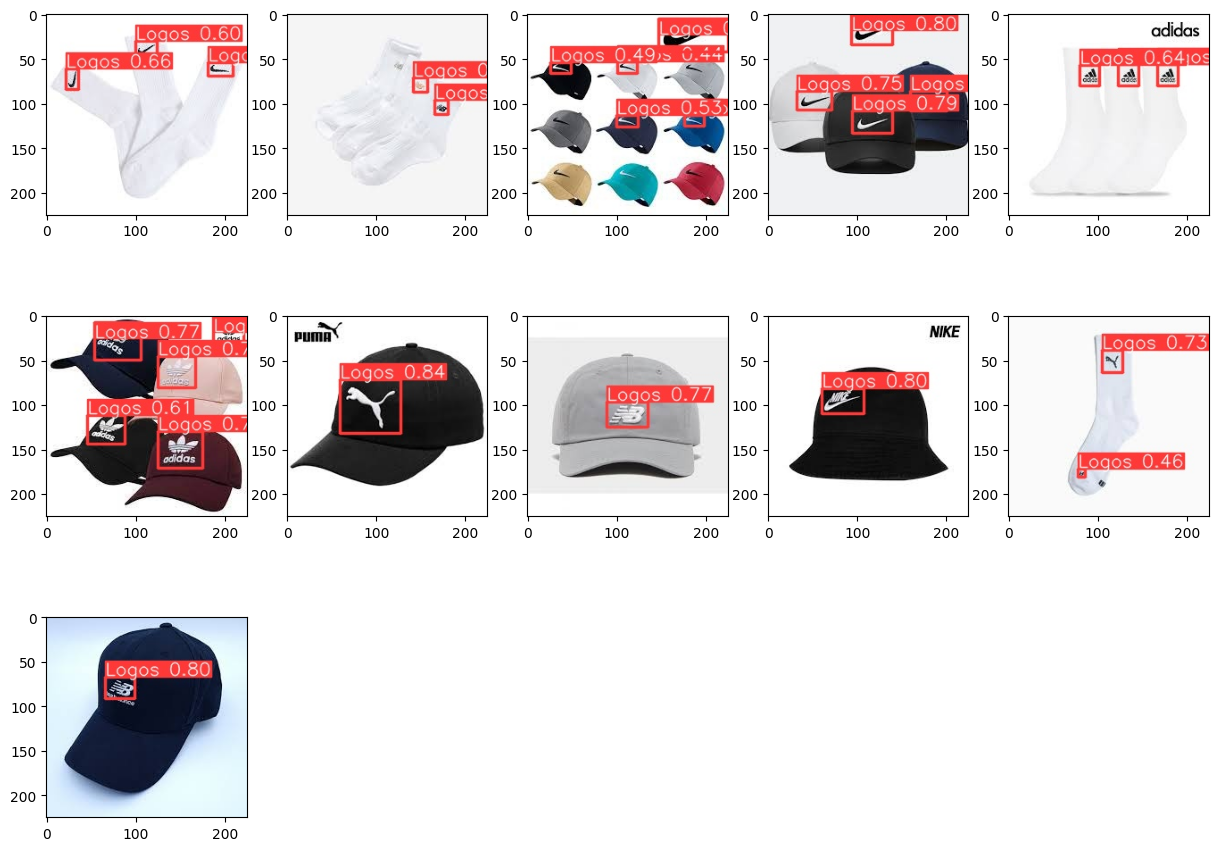

In [14]:
for file_name in os.listdir(f'/content/runs/detect'):
    test_folder = file_name
    break
# test_folder = 'train6'
print(f'test folder : {test_folder}')

fig = plt.figure(figsize=(15, 15))
rows = 4
cols = 5
i = 1

for file_name in os.listdir(f'/content/runs/detect/{test_folder}'):
    if fnmatch.fnmatch(file_name, '*.jpeg*'):
        image = cv2.imread(f'/content/runs/detect/{test_folder}/{file_name}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax = fig.add_subplot(rows, cols, i)
        ax.imshow(image)
        i += 1
plt.show()

#Crop Inferene Image
